# Synthetic data

We can test our Python module doing this:

In [1]:
from src.lib import synthetic_data

In [3]:
synthetic_data.synthesize_normal_data(10, 2)

array([11.54262024,  2.44854241])

## Sampling from $F$

In [61]:
import pyro
import torch
import torch.functional as F
import pyro.distributions.transforms as T
import matplotlib.pyplot as plt

In [8]:
U = pyro.distributions.Uniform(0, 1).rv

Available operations:
* Addition
* Subtraction
* Multiplication
* Division
* Absolute values `X.abs()`
* Exponentiation `X.pow(<int>)`
* Negation `X.neg()`
* Exp $e^X$ with `X.exp()`
* Log with `X.log()`
* Sigmoid transform `X.sigmoid()`
* tanh with `X.tanh()`
* Softmax with `X.softmax()`

In [10]:
X = (4 - U).exp()

In [13]:
X.dist.sample((10,))

tensor([23.7435, 32.2350, 47.8166, 26.0117, 22.8435, 52.3709, 38.0960, 33.1339,
        23.0440, 22.2954])

In [120]:
def plot_dist(transform_fn, title = None, n_samples_to_find_boundary=10000):
    U = pyro.distributions.Uniform(0, 1).rv
    X = transform_fn(U)
    
    samples = X.dist.sample((n_samples_to_find_boundary,))
    lower = samples.min()
    upper = samples.max()
    
    xs = torch.linspace(lower, upper, 1000)
    ys = torch.exp(X.dist.log_prob(xs))
    plt.plot(xs, ys)
    plt.xlabel("value in support")
    plt.ylabel("Density")
    if title is not None:
        plt.title(title)
    

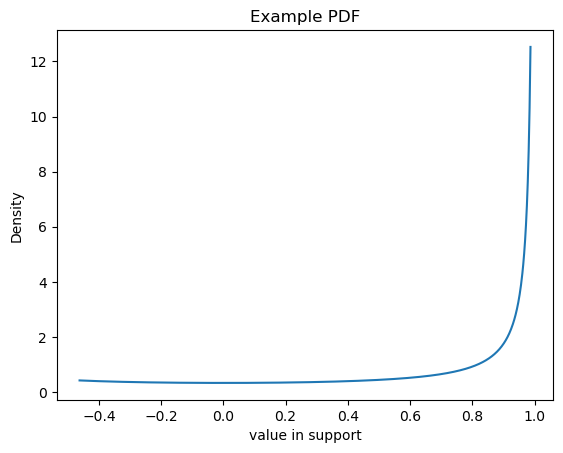

In [121]:
def example_transform(u):
    return (u * 3 - .5).tanh() #+ (u / 10 + 1).exp() * 10
plot_dist(example_transform, "Example PDF")

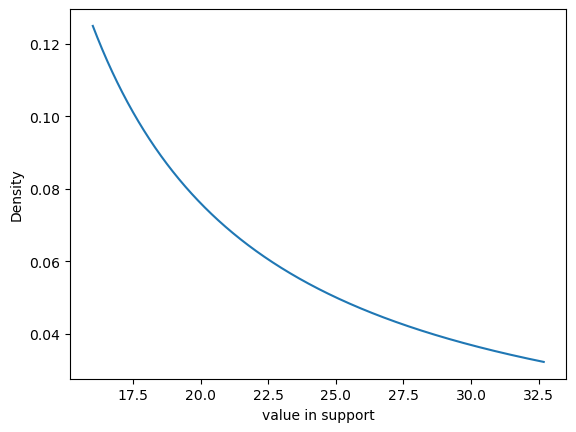

In [145]:
def f(u):
    return (u.exp() + 3).pow(2.)
plot_dist(f)